In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score

In [2]:
df = pd.read_csv('HR Employee Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
le_attrition = LabelEncoder()
le_biztravel = LabelEncoder()
le_edu_field = LabelEncoder()
le_marital_status = LabelEncoder()
df['attrition_n'] = le_attrition.fit_transform(df['Attrition'])
df['biz_travel_n'] = le_attrition.fit_transform(df['BusinessTravel'])
df['edufield_n'] = le_attrition.fit_transform(df['EducationField'])
df['marital_status_n'] = le_marital_status.fit_transform(df['MaritalStatus'])

In [7]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition_n,biz_travel_n,edufield_n,marital_status_n
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,1,2,1,2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,0,1,1,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,1,2,4,2


In [8]:
df1 = df.drop(columns=['Attrition','BusinessTravel','DailyRate','Department','EducationField'],axis='columns')
df5 = df1.drop(columns=['Gender','JobRole','MaritalStatus','Over18', 'OverTime'])
df5.head(3)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition_n,biz_travel_n,edufield_n,marital_status_n
0,41,1,2,1,1,2,94,3,2,4,...,0,1,6,4,0,5,1,2,1,2
1,49,8,1,1,2,3,61,2,2,2,...,3,3,10,7,1,7,0,1,1,1
2,37,2,2,1,4,4,92,2,1,3,...,3,3,0,0,0,0,1,2,4,2


###### Split the data set into train(80%) and test(20%)

In [9]:
X = df5.drop('attrition_n',axis='columns')
y = df5['attrition_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

###### Create decision tree classifier

In [10]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100,min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

###### plot_tree method from sklearn  allows us to easily produce figure of the tree

[Text(0.5, 0.875, 'x[10] <= 3413.5\nentropy = 0.615\nsamples = 1176\nvalue = [997, 179]'),
 Text(0.25, 0.625, 'x[24] <= 0.5\nentropy = 0.827\nsamples = 365\nvalue = [270, 95]'),
 Text(0.125, 0.375, 'x[1] <= 4.5\nentropy = 0.985\nsamples = 112\nvalue = [64, 48]'),
 Text(0.0625, 0.125, 'entropy = 0.843\nsamples = 48\nvalue = [35, 13]'),
 Text(0.1875, 0.125, 'entropy = 0.994\nsamples = 64\nvalue = [29, 35]'),
 Text(0.375, 0.375, 'x[17] <= 0.5\nentropy = 0.693\nsamples = 253\nvalue = [206, 47]'),
 Text(0.3125, 0.125, 'entropy = 0.881\nsamples = 110\nvalue = [77, 33]'),
 Text(0.4375, 0.125, 'entropy = 0.462\nsamples = 143\nvalue = [129, 14]'),
 Text(0.75, 0.625, 'x[17] <= 0.5\nentropy = 0.48\nsamples = 811\nvalue = [727, 84]'),
 Text(0.625, 0.375, 'x[20] <= 2.5\nentropy = 0.622\nsamples = 342\nvalue = [289, 53]'),
 Text(0.5625, 0.125, 'entropy = 0.857\nsamples = 89\nvalue = [64, 25]'),
 Text(0.6875, 0.125, 'entropy = 0.502\nsamples = 253\nvalue = [225, 28]'),
 Text(0.875, 0.375, 'x[1] <= 12

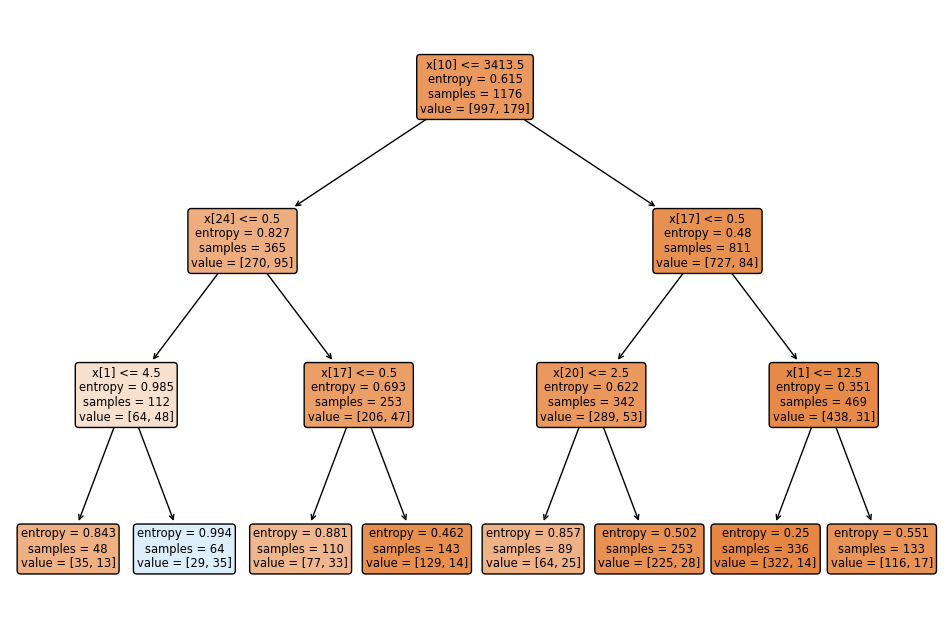

In [24]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_train, y_train), filled=True,rounded=True)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
y_pred_train = clf.predict(X_train)

###### accuracy_score -> method compares predicted values with the true values.Useful for comparing multiple models.

In [14]:
print('criterion entropy accuracy: {0:.2f}'. format(accuracy_score(y_test,y_pred)*100))
print('Training set: {0:.2f}'. format(accuracy_score(y_train,y_pred_train)*100))

criterion entropy accuracy: 80.95
Training set: 85.29


###### score -> This method evaluates the model on test data.Useful for quick model evaluation

In [15]:
print('Training set score: {0:.2f}'.format(clf.score(X_train, y_train)*100))
print('Test set score: {0:.2f}'.format(clf.score(X_test, y_test)*100))

Training set score: 85.29
Test set score: 80.95


###### Confusion Matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[229   7]
 [ 49   9]]


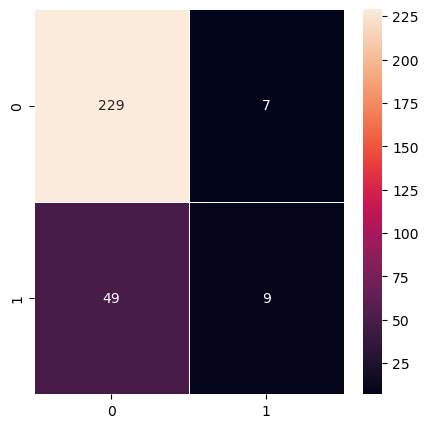

In [17]:
plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,fmt= '.0f')
plt.show()

###### 1. Precision: Percentage of correct positive predictions relative to total positive predictions.

###### 2. Recall: Percentage of correct positive predictions relative to total actual positives.

###### 3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
######         F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

###### 4. Support is how many samples are in each class.

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       236
           1       0.56      0.16      0.24        58

    accuracy                           0.81       294
   macro avg       0.69      0.56      0.57       294
weighted avg       0.77      0.81      0.76       294



In [19]:
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.24324324324324326
